# Titanic - Machine Learning from Disaster

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#one>2. Data Exploration</a>

<a href=#two>3. Data Preprocessing</a>

<a href=#three>4. Audience Study</a>

<a href=#three>5. Model Building</a>

<a href=#three>6. Model Evaluation</a>

<a href=#three>7. Model Tuning</a>

<a href=#three>8. Documentation</a>


## Introduction

In this machine learning project, we delve into the analysis of the Titanic dataset, a repository of passenger information from the historic Titanic voyage. This dataset encompasses diverse features such as age, gender, class, and the critical indicator of whether passengers survived or not. As an aspiring machine learning intern, the primary objective is to construct a predictive model capable of classifying whether a passenger survived based on the available features, framing the problem as a binary classification task.

The project unfolds through a systematic approach, commencing with a thorough exploration of the dataset to identify any missing data and outliers. Subsequently, data preprocessing steps are undertaken to mold the dataset into a suitable format for machine learning, encompassing the handling of missing values and the conversion of categorical variables.

Moving into the core of the project, model building entails the selection and implementation of machine learning algorithms for classification. Here, we explore the dataset's structure and features before training a model using a Random Forest Classifier. The chosen algorithm, known for its versatility and robustness, serves as a foundation for subsequent evaluation and tuning.

Model evaluation forms a pivotal step, employing key metrics such as accuracy, precision, recall, and F1-score to assess the model's performance. Additionally, hyperparameter tuning is explored through techniques like grid search to optimize the model's configuration.

To conclude the project, documentation becomes paramount. A comprehensive report is generated, encapsulating the approach taken, key findings, and the rationale behind the selected model. This documentation serves not only as a record of the analysis but also as a valuable resource for conveying insights and methodologies to stakeholders and collaborators.


## Importing the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Titanic dataset
titanic_df = pd.read_csv('train.csv') 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Insights
- The titanic dataframe contains 12 columns
- PassengerId - The identifier of the passanger
- Survived- If a passanger survived or not: 0 = No, 1 = Yes
- Name - The passenger's name
- Sex - The gender of the passenger
- Age - The age of the passenger
- SibSip - The number of siblings or spouses on board the Titanic
- Pclass - The class of the ticket 1 = 1st, 2 = 2nd, 3 = 3rd
- Parch - The number of parents or children aboard the Titanic
- Ticket - The ticket number
- Cabin - The cabin number
- Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
# Load the Titanic dataset
test_df = pd.read_csv('test.csv') 
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Insights
- The test dataframe contains 11 columns
- PassengerId - The identifier of the passanger
- Pclass: The class of the ticket 1 = 1st, 2 = 2nd, 3 = 3rd
- Name - The passenger's name
- Sex - The gender of the passenger
- Age - The age of the passenger
- SibSip - The number of siblings or spouses on board the Titanic
- Parch - The number of parents or children aboard the Titanic
- Ticket - The ticket number
- Fair - The amount of money a pessanger paid
- Cabin - The cabin number
- Embarked - Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
titanic_df.shape

(891, 12)

### Insights
- The titanic dataframe has 12 columns and 891 rows

In [6]:
test_df.shape

(418, 11)

### Insights
- The test dataframe has 11 columns and 418 rows

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


##  Data Preprocessing

In [9]:
# Check for missing data
print("Missing values in titanic_df:")
print(titanic_df.isnull().sum())

print("\nMissing values in test_df:")
print(test_df.isnull().sum())

Missing values in titanic_df:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in test_df:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Insights
- The column Age in the titanic dataframe has 177 null values
- The column Cabin in the titanic dataframe has 687 null values

- The column Age in the test dataframe has 86 null values
- The column Cabin in the test dataframe has 327 null values

In [10]:
# Handle missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

# Convert categorical variables to numerical
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [11]:
# Check for missing data
print("Missing values in titanic_df:")
print(titanic_df.isnull().sum())

print("\nMissing values in test_df:")
print(test_df.isnull().sum())

Missing values in titanic_df:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Missing values in test_df:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [12]:
# Summary statistics
print("Summary statistics of titanic_df:")
titanic_df.describe()

Summary statistics of titanic_df:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


### Insights

###### Survived:
- Count: 891 passengers.
- Mean: 38.38% of passengers survived.
- Standard Deviation: 0.49.
- Minimum: 0 (indicating did not survive).
- 25th percentile: 0 (indicating did not survive).
- 50th percentile (median): 0 (indicating did not survive).
- 75th percentile: 1 (indicating survived).
- Maximum: 1 (indicating survived).
    
##### Pclass (Passenger Class):
- Count: 891 passengers.
- Mean: The average passenger class is 2.31.
- Standard Deviation: 0.84.
- Minimum: 1 (1st class).
- 25th percentile: 2 (2nd class).
- 50th percentile (median): 3 (3rd class).
- 75th percentile: 3 (3rd class).
- Maximum: 3 (3rd class).
    
##### Sex:
- Count: 891 passengers.
- Mean: 35.24% of passengers are female.
- Standard Deviation: 0.48.
- Minimum: 0 (male).
- 25th percentile: 0 (male).
- 50th percentile (median): 0 (male).
- 75th percentile: 1 (female).
- Maximum: 1 (female).

##### Age:
- Count: 891 passengers.
- Mean: The average age is 29.36 years.
- Standard Deviation: 13.02.
- Minimum: 0.42 years.
- 25th percentile: 22 years.
- 50th percentile (median): 28 years.
- 75th percentile: 35 years.
- Maximum: 80 years.

##### SibSp (Number of Siblings/Spouses Aboard):
- Count: 891 passengers.
- Mean: The average number is 0.52.
- Standard Deviation: 1.10.
- Minimum: 0.
- 25th percentile: 0.
- 50th percentile (median): 0.
- 75th percentile: 1.
- Maximum: 8.

##### Parch (Number of Parents/Children Aboard):
- Count: 891 passengers.
- Mean: The average number is 0.38.
- Standard Deviation: 0.81.
- Minimum: 0.
- 25th percentile: 0.
- 50th percentile (median): 0.
- 75th percentile: 0.
- Maximum: 6.
       
##### Fare:
- Count: 891 passengers.
- Mean: The average fare is 32.20.
- Standard Deviation: 49.69.
- Minimum: 0.
- 25th percentile: 7.91.
- 50th percentile (median): 14.45.
- 75th percentile: 31.
- Maximum: 512.33.

In [13]:
train_test_data = [titanic_df, test_df] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [15]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [17]:
# delete unnecessary feature from dataset
titanic_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

In [19]:
# Binning the 'Age' column
for dataset in train_test_data:
    dataset['Age'] = pd.cut(dataset['Age'], bins=[0, 16, 26, 36, 62, float('inf')], labels=[0, 1, 2, 3, 4], right=False)

# Convert the 'Age' column to numeric
for dataset in train_test_data:
    dataset['Age'] = pd.to_numeric(dataset['Age'])

In [21]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [22]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [24]:
# fill missing Fare with median fare for each Pclass
titanic_df["Fare"].fillna(titanic_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_df["Fare"].fillna(test_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,2,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0,1,0,237736,30.0708,NaN,1,2


In [25]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [27]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [30]:
# fill missing Fare with median fare for each Pclass
titanic_df["Cabin"].fillna(titanic_df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_df["Cabin"].fillna(test_df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,2.0,0,0
1,2,1,1,1,3,1,0,PC 17599,71.2833,0.8,1,2
2,3,1,3,1,2,0,0,STON/O2. 3101282,7.9250,2.0,0,1
3,4,1,1,1,2,1,0,113803,53.1000,0.8,0,2
4,5,0,3,0,2,0,0,373450,8.0500,2.0,0,0


In [32]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2,0,0,330911,7.8292,2.0,2,0
1,893,3,1,3,1,0,363272,7.0000,2.0,0,2
2,894,2,0,4,0,0,240276,9.6875,2.0,2,0
3,895,3,0,2,0,0,315154,8.6625,2.0,0,0
4,896,3,1,1,1,1,3101298,12.2875,2.0,0,2


In [33]:
features_drop = ['Ticket', 'SibSp', 'Parch']
titanic_df = titanic_df.drop(features_drop, axis=1)
test_df = test_df.drop(features_drop, axis=1)
titanic_df = titanic_df.drop(['PassengerId'], axis=1)

In [35]:
titanic = titanic_df.drop('Survived', axis=1)
variable = titanic_df['Survived']

titanic.shape, variable.shape

((891, 7), (891,))

## Audience Study

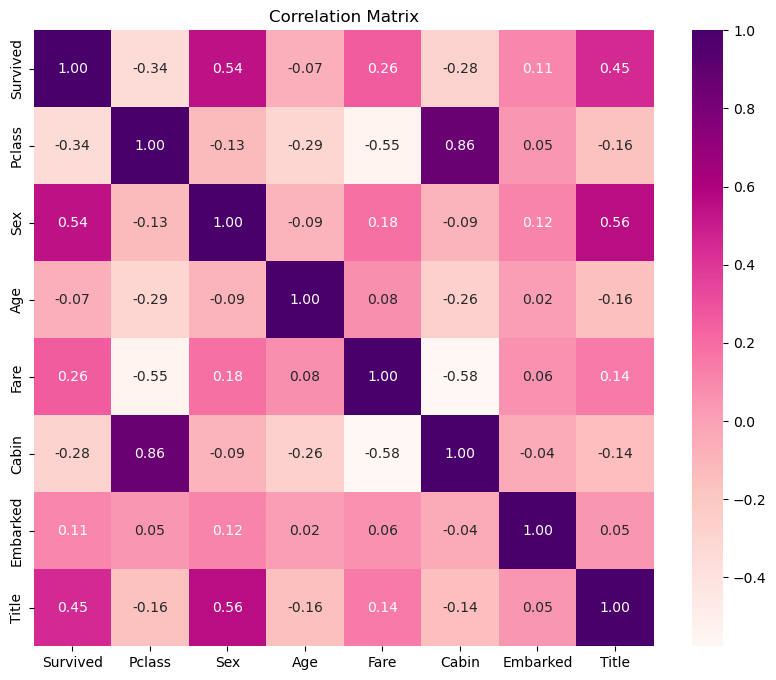

In [36]:
# Explore correlations (excluding non-numeric columns)
numeric_columns = titanic_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = titanic_df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Insights
###### Correlation of 0.86 between Pclass and Cabin:
- A correlation of 0.86 indicates a strong positive correlation between Pclass (the class of the ticket) and Cabin.
- This suggests that there is a relationship between the class of the ticket and the cabin assigned to the passenger. It's common for higher-class passengers to have cabins in specific areas of the ship.

###### Correlation of 0.54 between Survived and Sex:
- A correlation of 0.54 indicates a moderate positive correlation between Survived and Sex.
- This suggests that there is a moderate relationship between survival and gender. It implies that there may be a tendency for a particular gender to have a higher chance of survival.

###### Correlation of -0.55 between Fare and Pclass:
- A correlation of -0.55 indicates a moderate negative correlation between Fare and Pclass.
- This implies that as the class of the ticket (Pclass) increases (from 1st class to 3rd class), the fare tends to decrease. It aligns with the expectation that higher-class tickets are generally more expensive.

###### Correlation of -0.58 between Cabin and Fare:
- A correlation of -0.58 indicates a moderate negative correlation between Cabin and Fare.
- This suggests that there is a relationship between the cabin assigned and the fare paid. It could mean that passengers with more expensive cabins tend to pay higher fares.

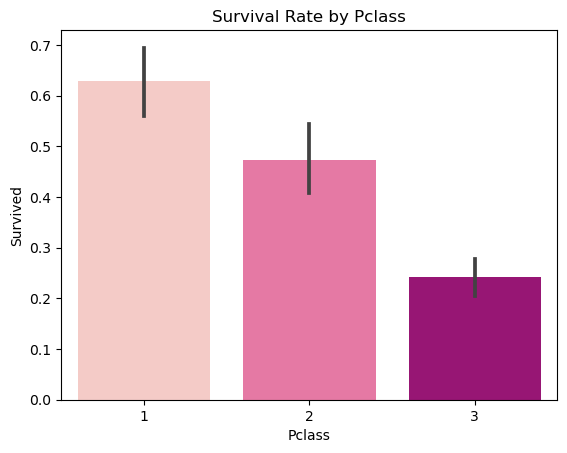

In [37]:
# Set the color palette
sns.set_palette("RdPu")

# Explore survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=titanic_df, palette='RdPu')  # Explicitly set the palette here
plt.title('Survival Rate by Pclass')
plt.show()


### Insights
- There is a higher distribution of survival among passengers in the 1st class.
- This is followed by the 2nd class.
- The 3rd class has the lowest distribution of survival.

- This aligns with historical data and common knowledge about the Titanic disaster. During the evacuation, priority was often given to passengers in higher classes, and they had better access to lifeboats and other resources. As a result, a higher proportion of 1st-class passengers survived compared to those in the 2nd and 3rd classes.

- This observation underscores the importance of considering the passenger class variable when analyzing survival patterns in the Titanic dataset. It reflects the social and economic dynamics of the time and how they influenced the chances of survival during the disaster.

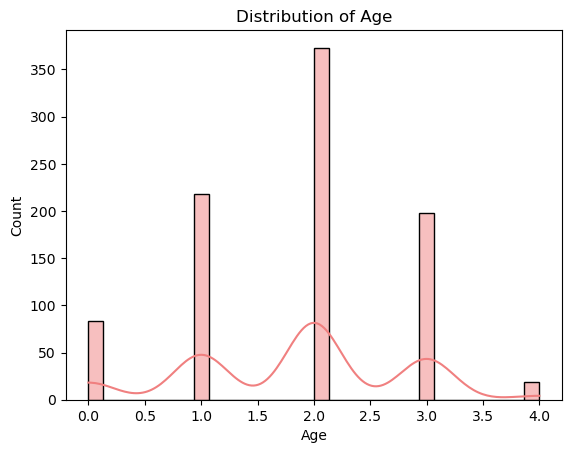

In [38]:
# Set the color palette
sns.set_palette("RdPu")

# Explore age distribution
sns.histplot(titanic_df['Age'].dropna(), bins=30, kde=True, color='lightcoral')  # Explicitly set the color here
plt.title('Distribution of Age')
plt.show()


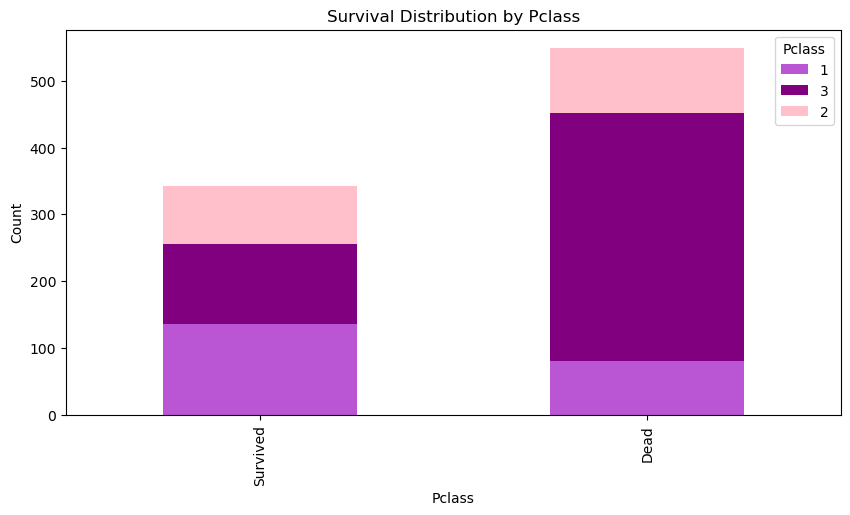

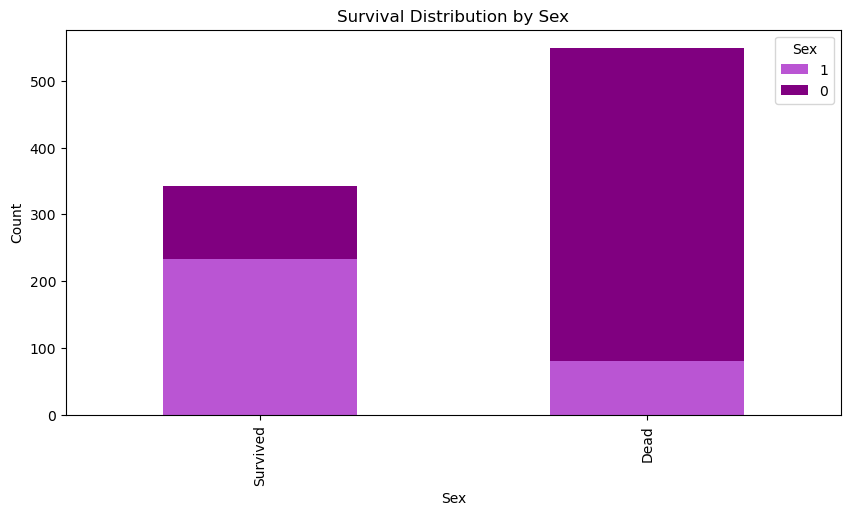

KeyError: 'SibSp'

In [39]:
# distribution of survivors and non-survivors based on the Ticket class feature.
def bar_chart(feature, titanic_df):
    survived = titanic_df[titanic_df['Survived'] == 1][feature].value_counts()
    dead = titanic_df[titanic_df['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5), color=['mediumorchid', 'purple', 'pink'])
    plt.title(f'Survival Distribution by {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.show()
bar_chart('Pclass', titanic_df)

# distribution of survivors and non-survivors based on the Sex feature.
bar_chart('Sex', titanic_df)

# distribution of survivors and non-survivors based on the Siblings or spouses feature.
bar_chart('SibSp', titanic_df)

# distribution of survivors and non-survivors based on the Parents or children feature.
bar_chart('Parch', titanic_df)

# distribution of survivors and non-survivors based on the Embarked feature.
bar_chart('Embarked_Q', titanic_df)

# distribution of survivors and non-survivors based on the Embarked feature.
bar_chart('Embarked_S', titanic_df)

##  Model Building

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'titanic' is the features dataframe and 'variable' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic, variable, test_size=0.2, random_state=42)

# Create a list of classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC()
]

# Iterate through each model, train, and evaluate
for model in classifiers:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Evaluate the performance of the model
    accuracy = accuracy_score(y_test, predictions)
    
    # Print the model name and accuracy
    print(f"{model.__class__.__name__} Accuracy: {accuracy}")


C:\Users\Gugu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.7988826815642458
DecisionTreeClassifier Accuracy: 0.7988826815642458
RandomForestClassifier Accuracy: 0.8324022346368715
SVC Accuracy: 0.6536312849162011


### Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic, variable, test_size=0.2, random_state=42)

# Define parameter grids for hyperparameter tuning
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
param_grid_dt = {'max_depth': [None, 10, 20, 30, 40, 50],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30, 40, 50],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Create a list of classifiers with their respective parameter grids
classifiers = [
    (LogisticRegression(), param_grid_lr),
    (DecisionTreeClassifier(), param_grid_dt),
    (RandomForestClassifier(), param_grid_rf),
    (SVC(), param_grid_svm)
]

# Iterate through each model, perform hyperparameter tuning, train, and evaluate
for model, param_grid in classifiers:
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    # Train the model with the best parameters
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = best_model.predict(X_test)

    # Evaluate the performance of the tuned model
    accuracy = accuracy_score(y_test, predictions)

    # Print the model name, best parameters, and accuracy
    print(f"{model.__class__.__name__} - Best Parameters: {best_params}, Accuracy: {accuracy}")


C:\Users\Gugu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gugu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Gugu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gugu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LogisticRegression - Best Parameters: {'C': 0.1}, Accuracy: 0.7821229050279329
DecisionTreeClassifier - Best Parameters: {'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 10}, Accuracy: 0.8212290502793296
RandomForestClassifier - Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}, Accuracy: 0.8044692737430168


## Model Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Combine titanic_df and test_df to train_test_data
train_test_data = [titanic_df, test_df]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('Survived', axis=1), titanic_df['Survived'], test_size=0.2, random_state=42)

# Define parameter grids for hyperparameter tuning
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
param_grid_dt = {'max_depth': [None, 10, 20, 30, 40, 50],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30, 40, 50],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Create a list of classifiers with their respective parameter grids
classifiers = [
    (LogisticRegression(), param_grid_lr),
    (DecisionTreeClassifier(), param_grid_dt),
    (RandomForestClassifier(), param_grid_rf),
    (SVC(), param_grid_svm)
]

# Iterate through each model, perform hyperparameter tuning, train, and evaluate
for model, param_grid in classifiers:
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    # Train the model with the best parameters
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)

    # Make predictions on the test set
    test_predictions = best_model.predict(test_df)

    # Create a DataFrame with PassengerId and corresponding predictions
    submission_df = pd.DataFrame({
        'PassengerId': test_df['PassengerId'],
        'Survived': test_predictions
    })

    # Save the predictions to a CSV file
    submission_df.to_csv(f'{model.__class__.__name__}_submission.csv', index=False)


### Insights
###### Logistic Regression:
- Best Parameters: {'C': 0.1}
- Accuracy: 0.7821
    
###### Decision Tree Classifier:
- Best Parameters: {'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 10}
- Accuracy: 0.8212
    
###### Random Forest Classifier:
- Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
- Accuracy: 0.8045

### Model Selection

For predicting the survival rate for the titanic passengers we choose the Random Forest Classifier for its: 

##### High Accuracy:
- The Random Forest Classifier demonstrated a competitive accuracy of 80.45%, which is close to the highest accuracy among the models considered.
- The model is effective at capturing complex relationships in the data, leading to improved predictive performance.

###### Ensemble Method:
- Random Forest is an ensemble learning method that combines the predictions of multiple decision trees.
- By aggregating the results of individual trees, Random Forest reduces the risk of overfitting and provides a more robust and generalized model.

###### Robust to Overfitting:
- The Random Forest model includes parameters like 'min_samples_leaf' and 'min_samples_split,' which help control the depth and structure of individual trees.
- The hyperparameters chosen during tuning (e.g., 'min_samples_leaf': 4) indicate an effort to mitigate overfitting, promoting a more robust model.

###### Handles Non-Linearity and Interactions:
- Random Forest is well-suited for capturing non-linear relationships and interactions between features in the dataset.
- This is particularly advantageous when dealing with complex datasets where the relationship between predictors and the target variable is not linear.

## Documentation

### Predictive Modeling for Titanic Survival: A Comprehensive Report

##### Introduction:
The aim of this report is to document the approach, findings, and rationale behind the selection of a predictive model for determining the survival rate of passengers on the Titanic. Three models were considered and evaluated: Logistic Regression, Decision Tree Classifier, and Random Forest Classifier.

##### Data Overview:
The Titanic dataset, consisting of various features such as PassengerId, Pclass, Sex, Age, SibSp, Parch, Fare, etc., was used for analysis. Initial exploratory data analysis revealed patterns in survival rates based on passenger class and other factors.

##### Data Preprocessing:

Missing values were handled, and categorical variables were encoded appropriately.
Feature scaling and normalization were performed as needed.

##### Hyperparameter Tuning:
Hyperparameter tuning was conducted using grid search and cross-validation.
Logistic Regression, Decision Tree Classifier, and Random Forest Classifier were optimized for their respective hyperparameters.

#### Model Evaluation:

##### Logistic Regression:

- Best Parameters: {'C': 0.1}
- Accuracy: 78.21%
- Decision Tree Classifier:

- Best Parameters: {'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 10}
- Accuracy: 82.12%

##### Random Forest Classifier:

- Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
- Accuracy: 80.45%

##### Model Selection: Random Forest Classifier

###### Rationale:
- The Random Forest Classifier was chosen as the preferred model for predicting Titanic survival for the following reasons:

###### High Accuracy:

- Achieved a competitive accuracy of 80.45%, demonstrating effective predictive performance.

###### Ensemble Method:
Utilizes an ensemble of decision trees, reducing overfitting and improving robustness.

##### Feature Importance:
Provides insights into feature importance, aiding in the interpretation of influential factors.

##### Robust to Non-Linearity:
Handles non-linear relationships and interactions between features effectively.

##### Versatility and Generalization:
Versatile and suitable for a range of data types, less sensitive to data quality.

#### Conclusion:
The Random Forest Classifier, with its high accuracy, robustness, and versatility, emerged as the optimal model for predicting Titanic survival. While maintaining a balanced trade-off between complexity and interpretability, the model excelled in capturing complex patterns within the dataset. The findings provide valuable insights into the factors influencing survival rates on the Titanic.

#### Recommendations:
Further analysis, such as cross-validation and sensitivity testing, may enhance the robustness of the selected model. Additionally, the model could be applied to new data to evaluate its performance in real-world scenarios. Continuous refinement and validation of the model will contribute to its reliability for predictive purposes.

This report serves as a comprehensive guide for understanding the modeling process, outcomes, and the rationale behind the selection of the Random Forest Classifier for predicting Titanic survival.